# Python Bootcamp Project 24-25: Customer Segmentation

In [1]:
# allows for multiple outputs in one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Data Import

In [2]:
import pandas as pd

data = pd.read_excel('Online Retail.xlsx')
print('******************************************** COLUMS OF DATASET *****************************************************')
data.columns
print('******************************************** PREVIEW OF FIRST 5 COLUMNS ********************************************')
data.head()
print('******************************************** PREVIEW OF LAST 5 COLUMNS ********************************************')
data.tail()
print('******************************************* NUMBER OF ROWS AND DATA TYPES ******************************************')
data.info()
print('************************************************ DESCRIPTION OF DATA  **********************************************')
data.describe()


******************************************** COLUMS OF DATASET *****************************************************


Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

******************************************** PREVIEW OF FIRST 5 COLUMNS ********************************************


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


******************************************** PREVIEW OF LAST 5 COLUMNS ********************************************


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


******************************************* NUMBER OF ROWS AND DATA TYPES ******************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
************************************************ DESCRIPTION OF DATA  **********************************************


,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


## Data Cleaning

In [3]:
# check the first few rows of the dataset
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
# check for missing values
print(data.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [5]:

# remove rows where 'Description' is null
data = data[data['Description'].notnull()]

In [6]:
# fill missing values in 'CustomerID' with 0 (as an example)
data['CustomerID'] = data['CustomerID'].fillna(0)

In [7]:
# remove duplicates
data = data.drop_duplicates()

In [8]:
# remove rows with negative 'Quantity' or 'UnitPrice'
data = data[(data['Quantity'] > 0) & (data['UnitPrice'] > 0)]

In [9]:
# convert 'InvoiceDate' to datetime format (if not already done)
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [10]:
# check the updated data information
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Index: 524878 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    524878 non-null  object        
 1   StockCode    524878 non-null  object        
 2   Description  524878 non-null  object        
 3   Quantity     524878 non-null  int64         
 4   InvoiceDate  524878 non-null  datetime64[ns]
 5   UnitPrice    524878 non-null  float64       
 6   CustomerID   524878 non-null  float64       
 7   Country      524878 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.0+ MB


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Order Behavior Analysis

In [11]:
# group data by 'StockCode' and count unique 'InvoiceNo' to determine total orders per product
# each unique 'InvoiceNo' represents one order
ordersPerProduct = data.groupby('StockCode')['InvoiceNo'].nunique()

# sort the grouped data in descending order to identify high-demand products
ordersPerProduct = ordersPerProduct.sort_values(ascending=False)

# reset the index to convert the grouped data into a regular dataframe
ordersPerProduct = ordersPerProduct.reset_index()

# rename columns to make them more descriptive
ordersPerProduct.columns = ['stockCode', 'orderCount']

In [12]:
# create a dataframe of unique product descriptions to provide context for the analysis
# remove duplicates to ensure one description per product
uniqueDescriptions = data[['StockCode', 'Description']].drop_duplicates()

# merge the product descriptions with the grouped data based on 'StockCode'
ordersPerProduct = pd.merge(
    ordersPerProduct,
    uniqueDescriptions,
    how='left',
    left_on='stockCode',
    right_on='StockCode'
)

# drop the redundant 'StockCode' column after merging (already renamed to 'stockCode')
ordersPerProduct.drop(columns=['StockCode'], inplace=True)

# display the top 10 high-demand products for review
print('Top 10 high-demand products:')
print(ordersPerProduct.head(10))

Top 10 high-demand products:
  stockCode  orderCount                         Description
0    85123A        2198  WHITE HANGING HEART T-LIGHT HOLDER
1    85123A        2198  CREAM HANGING HEART T-LIGHT HOLDER
2    85099B        2089             JUMBO BAG RED RETROSPOT
3     22423        1988            REGENCY CAKESTAND 3 TIER
4     47566        1685                       PARTY BUNTING
5     20725        1565             LUNCH BAG RED RETROSPOT
6     20725        1565                LUNCH BAG RED SPOTTY
7     84879        1455       ASSORTED COLOUR BIRD ORNAMENT
8     22197        1392                SMALL POPCORN HOLDER
9     22197        1392                      POPCORN HOLDER


/var/folders/l1/tqn9t32j23z1gf5xy348qg140000gn/T/ipykernel_24746/2828063248.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  topProducts['description'] = topProducts['Description'].astype(str)


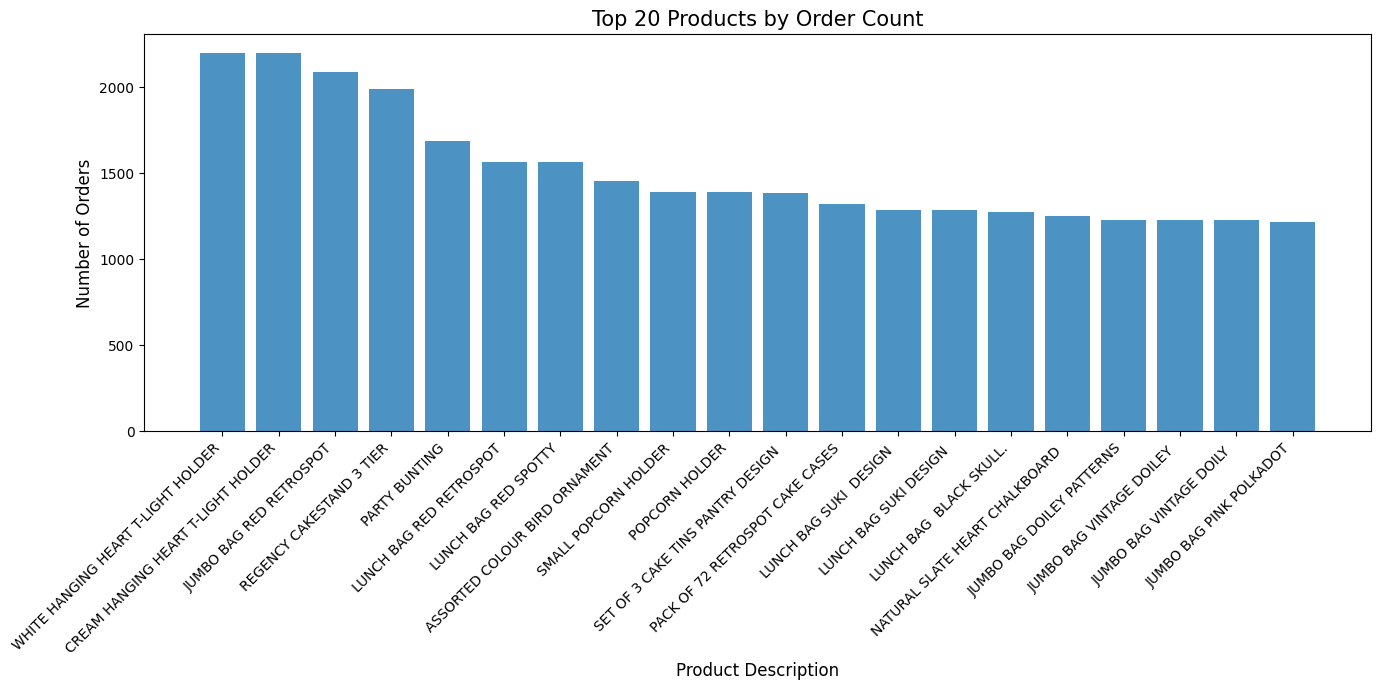

In [13]:
import matplotlib.pyplot as plt

# visualize order behavior with a bar chart
# select the top 20 products based on order count for visualization
topProducts = ordersPerProduct.head(20)

# ensure the 'description' column is of string type for proper plotting
topProducts['description'] = topProducts['Description'].astype(str)

# plot a bar chart with product descriptions on the x-axis
plt.figure(figsize=(14, 7))  # set figure size for better readability
plt.bar(topProducts['description'], topProducts['orderCount'], alpha=0.8)

# add labels and title to the chart
plt.xlabel('Product Description', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.title('Top 20 Products by Order Count', fontsize=15)

# customize x-axis labels for readability
plt.xticks(rotation=45, ha='right', fontsize=10)  # rotate and align labels

# adjust layout to prevent overlap of labels
plt.tight_layout()

# display the chart
plt.show();



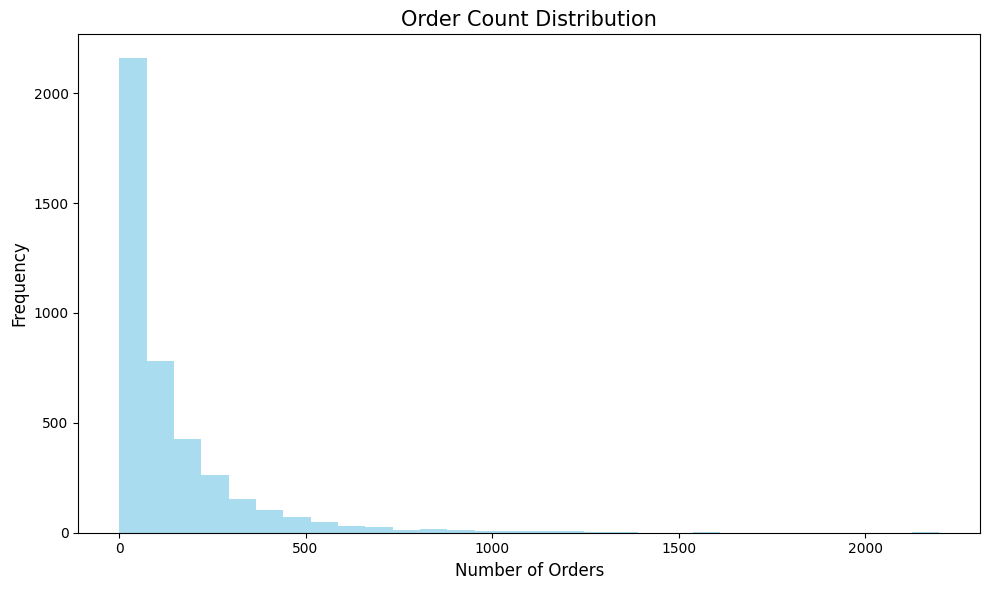

In [14]:
# visualize order distribution with a histogram
plt.figure(figsize=(10, 6))
plt.hist(ordersPerProduct['orderCount'], bins=30, color='skyblue', alpha=0.7)
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Order Count Distribution', fontsize=15)
plt.tight_layout()
plt.show();

In [15]:
# analyze frequency distribution
# calculate basic statistics
meanOrders = ordersPerProduct['orderCount'].mean()
medianOrders = ordersPerProduct['orderCount'].median()
modeOrders = ordersPerProduct['orderCount'].mode()[0]
maxOrders = ordersPerProduct['orderCount'].max()

print('Order count statistics:')
print(f' - Mean orders per product: {meanOrders:.2f}')
print(f' - Median orders per product: {medianOrders}')
print(f' - Mode orders per product: {modeOrders}')
print(f' - Maximum orders for a single product: {maxOrders}')

Order count statistics:
 - Mean orders per product: 137.63
 - Median orders per product: 69.0
 - Mode orders per product: 1
 - Maximum orders for a single product: 2198


## Customer Segmentation Clustering

In [29]:
# import necessary libraries
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# preprocess dataset to calculate RFM metrics and other customer-level features
customerData = data.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (data['InvoiceDate'].max() - x.max()).days,  # recency
    'InvoiceNo': 'nunique',  # frequency (number of orders)
    'UnitPrice': lambda x: np.sum(x * data.loc[x.index, 'Quantity']),  # monetary value
    'StockCode': 'nunique',  # number of unique products purchased
    'Quantity': lambda x: np.mean(x * data.loc[x.index, 'UnitPrice'])  # avg order value
}).reset_index()

# check the generated columns to ensure correctness
print(customerData.columns)  # debug step to confirm column names

# rename columns properly based on the generated output
customerData.columns = ['CustomerID', 'Recency', 'Frequency', 'MonetaryValue', 'UniqueProducts', 'AvgOrderValue']

# display the first few rows to verify the dataframe structure
customerData.head()

Index(['CustomerID', 'InvoiceDate', 'InvoiceNo', 'UnitPrice', 'StockCode',
       'Quantity'],
      dtype='object')


,CustomerID,Recency,Frequency,MonetaryValue,UniqueProducts,AvgOrderValue
0,0.0,0,1428,1754901.91,3408,13.276004
1,12346.0,325,1,77183.60,1,77183.600000
2,12347.0,1,7,4310.00,103,23.681319
3,12348.0,74,4,1797.24,22,57.975484
4,12349.0,18,1,1757.55,73,24.076027


In [17]:
# standardize features
scaler = StandardScaler()
scaledFeatures = scaler.fit_transform(customerData[['Recency', 'Frequency', 'MonetaryValue', 'UniqueProducts', 'AvgOrderValue']])

# apply k-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
customerData['Cluster'] = kmeans.fit_predict(scaledFeatures)

In [18]:
# inspect for extreme outliers in scaled features
z_scores = np.abs(scaledFeatures)
outliers = (z_scores > 3).any(axis=1)
print(f'Number of outliers: {outliers.sum()}')

# optionally remove outliers
cleanedFeatures = scaledFeatures[~outliers]
cleanedCustomerData = customerData[~outliers]

Number of outliers: 47


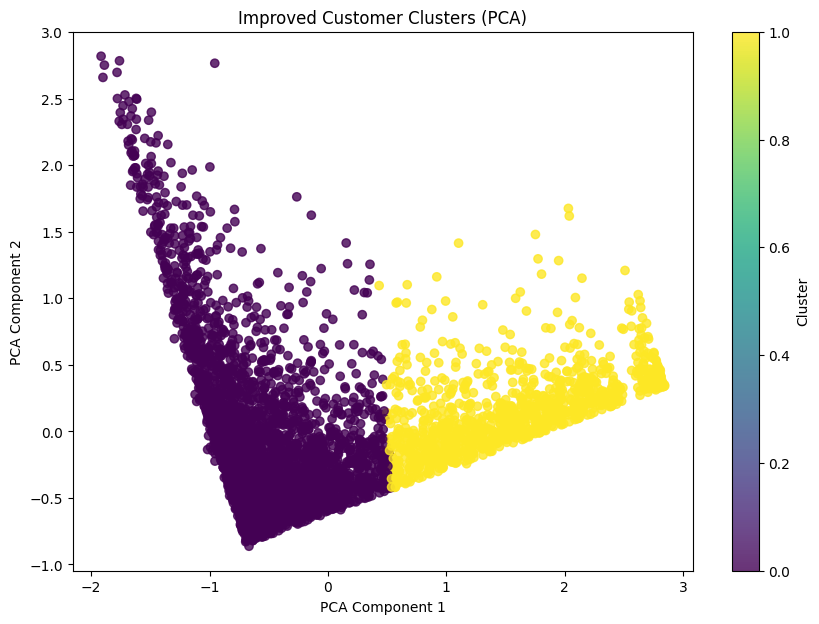

In [28]:
from sklearn.decomposition import PCA

# fit PCA on cleaned features
pca = PCA(n_components=2)
pcaComponents = pca.fit_transform(cleanedFeatures)

# visualize
plt.figure(figsize=(10, 7))
plt.scatter(pcaComponents[:, 0], pcaComponents[:, 1], c=cleanedCustomerData['Cluster'], cmap='viridis', alpha=0.8)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Improved Customer Clusters (PCA)')
plt.colorbar(label='Cluster')
plt.show();